In [88]:
# Importing libraries
import warnings
warnings.filterwarnings("ignore")

from pgmpy.models import BayesianModel
from pgmpy.factors.discrete import TabularCPD
from pgmpy.models import BayesianModel, JunctionTree

import networkx as nx
import matplotlib.pylab as plt
import pylab as plt

# Bayesian Model

In [26]:
#Defining structure
bm = BayesianModel ([('asia', 'tub'),
                    ('smoke', 'lung'), 
                    ('smoke', 'bronc'),
                    ('lung', 'either'),
                    ('tub', 'either'),
                    ('either', 'dysp'),
                    ('either', 'xray'),
                    ('bronc', 'dysp')]) 

In [ ]:
# Defining CPDs

c_asia = TabularCPD(variable='asia',variable_card=2,
                      values=[[0.01], [0.99]])

c_tub = TabularCPD(variable='tub', variable_card=2,
                   values=[[0.05,0.01],
                     [0.95,0.99]],
                   evidence=['asia'],
                   evidence_card=[2])

c_smoke = TabularCPD(variable='smoke', variable_card=2,
                     values=[[0.5], [0.5]])

c_lung = TabularCPD(variable='lung', variable_card=2,
                    values=[[0.1,0.01],
                            [0.9,0.99]],
                     evidence=['smoke'],
                    evidence_card=[2])

c_bronc = TabularCPD(variable='bronc', variable_card=2,
                     values=[[0.6,0.3],
                             [0.4,0.7]],
                     evidence=['smoke'], 
                     evidence_card=[2])

c_either = TabularCPD(variable='either', variable_card=2,
                        values=[[1, 1, 1, 0],
                                [0, 0, 0, 1]],
                        evidence=['lung', 'tub'],
                        evidence_card=[2, 2])

c_xray = TabularCPD(variable='xray', variable_card=2,
                    values=[[0.98,0.05],
                            [0.02,0.95]],
                     evidence=['either'], evidence_card=[2])

c_dysp = TabularCPD(variable='dysp', variable_card=2,
                        values=[[.9, .7, .8, .1],
                                [.1, .3, .2, .9]],
                        evidence=['bronc', 'either'],
                        evidence_card=[2, 2])

## Adding cpds
bm.add_cpds(c_asia, c_tub, c_smoke, c_lung, c_bronc, c_either, c_xray, c_dysp)

In [121]:
# Printing the CPDs
cpds = bm.get_cpds()
for cpd in cpds:
  print(cpd

+--------+------+
| asia_0 | 0.01 |
+--------+------+
| asia_1 | 0.99 |
+--------+------+
+-------+--------+--------+
| asia  | asia_0 | asia_1 |
+-------+--------+--------+
| tub_0 | 0.05   | 0.01   |
+-------+--------+--------+
| tub_1 | 0.95   | 0.99   |
+-------+--------+--------+
+---------+-----+
| smoke_0 | 0.5 |
+---------+-----+
| smoke_1 | 0.5 |
+---------+-----+
+--------+---------+---------+
| smoke  | smoke_0 | smoke_1 |
+--------+---------+---------+
| lung_0 | 0.1     | 0.01    |
+--------+---------+---------+
| lung_1 | 0.9     | 0.99    |
+--------+---------+---------+
+---------+---------+---------+
| smoke   | smoke_0 | smoke_1 |
+---------+---------+---------+
| bronc_0 | 0.6     | 0.3     |
+---------+---------+---------+
| bronc_1 | 0.4     | 0.7     |
+---------+---------+---------+
+----------+--------+--------+--------+--------+
| lung     | lung_0 | lung_0 | lung_1 | lung_1 |
+----------+--------+--------+--------+--------+
| tub      | tub_0  | tub_1  | tub_0

Plot of Bayesian Model: 


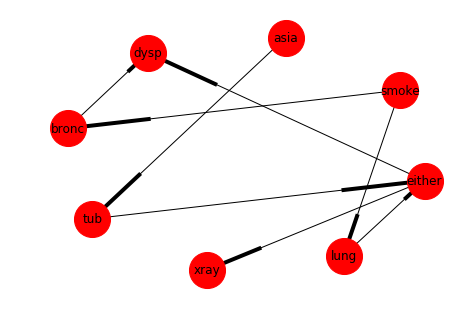

In [122]:
# Displaying the Bayesian Graph
print('Plot of Bayesian Model: ')
nx.draw(bm,
    with_labels=True,
    font_color='black',
    node_size= 1300,
    node_color= 'r',
    fontweight= 12,
    edge_color= 'black',
    width=1
   )
plt.show()

# Moral Graph

In [123]:
# moralizing by using to_markov
mm=bm.to_markov_model()
moral_model.nodes()
mm.edges()

[('asia', 'tub'),
 ('tub', 'either'),
 ('tub', 'lung'),
 ('either', 'lung'),
 ('either', 'dysp'),
 ('either', 'xray'),
 ('either', 'bronc'),
 ('lung', 'smoke'),
 ('dysp', 'bronc'),
 ('bronc', 'smoke')]

Plot of Moral Graph: 


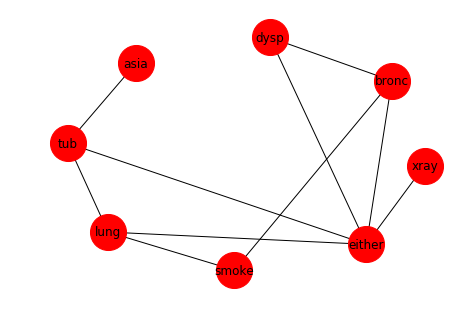

In [124]:
# Displaying the Moral Graph
print('Plot of Moral Graph: ')
nx.draw(mm,
    with_labels=True,
    font_color='black',
    node_size= 1300,
    node_color= 'r',
    fontweight= 12,
    edge_color= 'black',
    width=1
   )
plt.show()

# Triangulated Graph

In [125]:
tm=moral_model.triangulate()
tm.edges()

[('asia', 'tub'),
 ('asia', 'smoke'),
 ('asia', 'either'),
 ('asia', 'xray'),
 ('asia', 'bronc'),
 ('asia', 'dysp'),
 ('tub', 'either'),
 ('tub', 'lung'),
 ('tub', 'smoke'),
 ('either', 'lung'),
 ('either', 'dysp'),
 ('either', 'xray'),
 ('either', 'bronc'),
 ('either', 'smoke'),
 ('lung', 'smoke'),
 ('dysp', 'bronc'),
 ('dysp', 'xray'),
 ('dysp', 'smoke'),
 ('xray', 'smoke'),
 ('xray', 'bronc'),
 ('bronc', 'smoke')]

Plot of Triangulated Graph: 


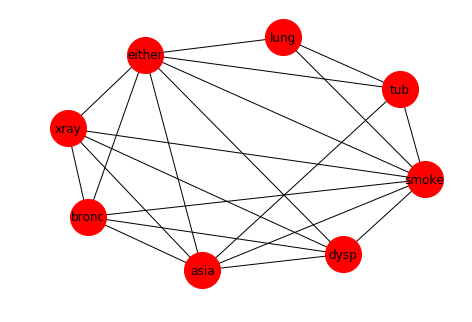

In [126]:
# Displaying the Triangulated Graph
print('Plot of Triangulated Graph: ')
nx.draw(tm,
    with_labels=True,
    font_color='black',
    node_size= 1300,
    node_color= 'r',
    fontweight= 12,
    edge_color= 'black',
    width=1
   )
plt.show()

# Junction Tree

In [127]:
from pgmpy.models import JunctionTree

jt_bayesian = bm.to_junction_tree()
jt_markov = mm.to_junction_tree()

Plot of Junction Graph: 


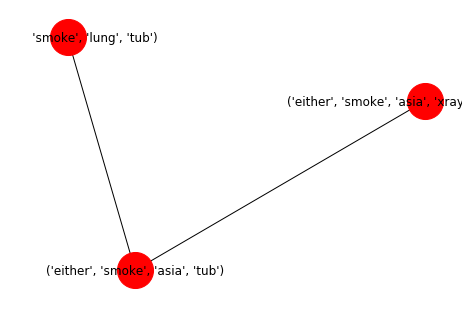

In [128]:
# Displaying the Junction Graph
print('Plot of Junction Graph: ')
nx.draw(jt_bayesian,
    with_labels=True,
    font_color='black',
    node_size= 1300,
    node_color= 'r',
    fontweight= 12,
    edge_color= 'black',
    width=1
   )
plt.show()

Plot of Junction Graph: 


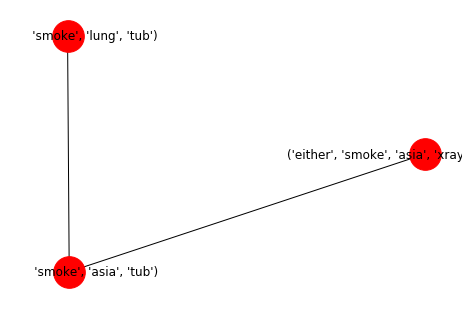

In [129]:
# Displaying the Junction Graph
print('Plot of Junction Graph: ')
nx.draw(jt_markov,
    with_labels=True,
    font_color='black',
    node_size= 1000,
    node_color= 'r',
    fontweight= 12,
    edge_color= 'black',
    width=1
   )
plt.show()

# Message Passing

In [143]:
from pgmpy.inference import Mplp
mplp = Mplp(mm)

In [144]:
mplp.find_triangles()

[['either', 'lung', 'tub'], ['either', 'dysp', 'bronc']]

In [ ]:
# Inference using Message Passing
mplp.map_query()

In [133]:
bp = BeliefPropagation(bm)
bp.calibrate()

In [167]:
print(bp.query(variables = ['lung'],
         evidence = {'asia': 0, 'xray':0}) ['lung'])

+--------+-------------+
| lung   |   phi(lung) |
+========+=============+
| lung_0 |      0.3715 |
+--------+-------------+
| lung_1 |      0.6285 |
+--------+-------------+


In [171]:
print(bp.query(variables = ['bronc'],
         evidence = {'asia': 0, 'xray':0}) ['bronc'])

+---------+--------------+
| bronc   |   phi(bronc) |
+=========+==============+
| bronc_0 |       0.4911 |
+---------+--------------+
| bronc_1 |       0.5089 |
+---------+--------------+


In [170]:
print(bp.query(variables = ['tub'],
         evidence = {'asia': 0, 'xray':0}) ['tub'])

+-------+------------+
| tub   |   phi(tub) |
+=======+============+
| tub_0 |     0.3377 |
+-------+------------+
| tub_1 |     0.6623 |
+-------+------------+


In [172]:
from pgmpy.inference import VariableElimination
infer = VariableElimination(bm)
print(infer.query(['lung'], evidence = {'asia': 1, 'xray': 1}) ['lung'])

+--------+-------------+
| lung   |   phi(lung) |
+========+=============+
| lung_0 |      0.0012 |
+--------+-------------+
| lung_1 |      0.9988 |
+--------+-------------+


In [173]:
print(infer.query(['lung'], evidence = {'asia': 1, 'xray': 1}) ['lung'])

+--------+-------------+
| lung   |   phi(lung) |
+========+=============+
| lung_0 |      0.0012 |
+--------+-------------+
| lung_1 |      0.9988 |
+--------+-------------+


In [174]:
print(infer.query(['lung'], evidence = {'asia': 1, 'xray': 1}) ['lung'])

+--------+-------------+
| lung   |   phi(lung) |
+========+=============+
| lung_0 |      0.0012 |
+--------+-------------+
| lung_1 |      0.9988 |
+--------+-------------+


# Answers and References

Running Intersection Property states that if a variable is present in a clique tree
then it must be present in all cliques along the path that connects them. In our case, 'smoke' is contained in all cliques 
along the path, hence running intersection property is satisfied for our junction tree.

-  http://pgmpy.org/
-  http://pgmpy.org/inference.html
-  http://pgmpy.org/models.html
-  https://learning.oreilly.com/library/view/mastering-probabilistic-graphical/9781784394684/ch03s03.html#ch03lvl2sec34